# Sistemas dinámicos

Los sistemas dinámicos son modelos de suma importancia en las ciencias. En general, un modelo dinámico intenta resolver la trayectoria temporal de alguna cantidad física como función de algún generador dinámico; este último usualmente representado de forma funcional.

En algunos casos, podemos modelar la dinámica de un estado genérico $y$ mediante la ecuación dinámica
\begin{equation}
\frac{dy}{dt} = f(t, y),
\end{equation}
sujeta a la condición inicial
\begin{equation}
y(t_0) = y_0.
\end{equation}

En esta notación, $y$ corresponde a un estado del sistema. Este estado puede ser representado mediante diferentes objetos matemáticos: desde cantidades escalares hasta matrices que representan cierto operador lineal. En la ecuación anterior, $t$ corresponde a la variable temporal.

El problema dinámico descrito anteriormente es usualmente conocido en el campo de las matemáticas aplicadas como **problema de condición inicial**. 

#### Laboratorio

Este tipo de problemas, el cual corresponde a algún modelo dinámico (para nombrar algunos ejemplos: sistemas electromagnéticos, dinámica de fluidos, sistemas caóticos, sistemas cuánticos, entre otros) será tema del curso más adelante. En este laboratorio, nuestro objetivo es aplicar conceptos de programación en `Python` utilizando `Jupyter Notebook`s para resolver el problema dinámico.

### Breve introducción a `Numpy`

En cálculos referentes a ciencia aplicada, una de las bibliotecas más importantes para diseñar aplicaciones científicas en `Python` es `Numpy`. `Numpy` está estructurado como un módulo, que debe ser importado para su uso.

Esto se realiza mediante la cláusula:

In [1]:
import numpy as np

La cláusula `import` importa el módulo a nuestro ambiente de programación, mientras que el *keyword* `as` implica que usaremos un acrónimo para invocar la funcionalidad del módulo; con el simple objetivo de no escribir la palabra `numpy` antes de cada función que invoquemos.

El objeto más importante del módulo `Numpy` es el `numpy.ndarray`. Este objeto es un contenedor (estructura de datos) que representa objetos como vectores, matrices o tensores. 

El constructor (estudiaremos contructores más adelante), se invoca pasando como argumento un `Python` `list`. Veamos por ejemplo como construir una matriz identidad 2x2 con esta estructura:

In [2]:
identityMatrix = np.array([[1,0], [0,1]])

print(identityMatrix)

[[1 0]
 [0 1]]


Note que pasamos una lista de listas para crear un objeto de mayor dimensión; i.e, una matrix. Los objetos creados con `np.array` contienen varias propiedades, tales como su tamaño y dichos atributos se accesan mediante el operador `.`:

In [3]:
identityMatrix.shape

(2, 2)

Los objetos se pueden operar matemáticamente de forma sencilla:

In [4]:
identityMatrix + identityMatrix

array([[2, 0],
       [0, 2]])

In [5]:
aEx = np.array([[0,1], [1,0]])

np.dot(aEx, aEx) # El producto matricial A*B

array([[1, 0],
       [0, 1]])

La documentación de `Numpy` se puede accesar mediante su página de referencia:
[NumPy](https://numpy.org)

## Soluciones a sistemas dinámicos

Los sistemas dinámicos y las soluciones numéricas a ecuaciones diferenciales son un tema importante de este curso que será estudiado más adelante. De momento, queremos utilizar este problema para familiarizarnos con el ambiente de programación científica.

Lo primero que vamos a hacer es describir el método numérico que vamos a utilizar para implementar la solución.

Vamos a utilizar el método Runge-Kutta de orden 4 para resolver el problema.

## Método Runge-Kutta de orden 4 (RK4)

Escriba las ecuaciones del método numérico utilizando LateX embedido en una celda de Markdown:

Cambie esta celda a tipo Markdown y utilice LateX para escribir las ecuaciones que 
se utilizan para resolver el problema utilizando el método RK4.

* $ k_1 = h\cdot f(x,t) $ 

* $ k_2 = h\cdot f(x+\frac{k_1}{2}, t+\frac{h}{2})$

* $ k_3 = h \cdot f(x+\frac{k_2}{2}, t+\frac{h}{2}) $

* $ k_4 = h \cdot f(x+k_3, t+h) $

* $ x(t+h) = x(t) + \frac{1}{6} (k_1 + 2k_2 + 2k_3 + k_4)$

## Ejemplo

Armados con esta metodología vamos a estudiar la solución de un problema dinámico genérico.

Asumamos que queremos estudiar la evolución temporal de un estado $\mathbf{y}(t)$. Este estado será representado mediante una matriz 2x2 que corresponde a algún operador lineal. La función que genra la dinámica del problema es 
$$
f(t, \mathbf{y}) = -{\rm{i}} [\mathbf{O}, \mathbf{y}(t)],
$$
donde $\mathbf{O}$ es otro operador lineal, ${\rm{i}}$ es la constante compleja y $[A, B] = AB - BA$ es un operación de conmutación. Note que **la función $f(t, \mathbf{y})$ no depende explícitamente de la variable temporal**.

En Python, la constante compleja se denota mediante:

In [6]:
iConst = 1.0j

print(iConst)

1j


La dinámica del problema depende intrínsicamente del operador $\mathbf{O}$. Escojamos el siguiente operador:

In [7]:
oOper = np.array([[0, 1], [1, 0]])

print(oOper)

[[0 1]
 [1 0]]


Dicho operador puede tener distintos significados físicos dependiendo del problema dinámico en cuestión. Puede representar un mapa algebraico, el generador dinámico de un sistema caótico, un Hamiltoniano, etc. 

Lo siguiente es difinir un estado inicial. De igual forma, dicho estado puede representar cantidades físicas de un sistema. Consideremos:

In [8]:
yInit = np.array([[1, 0], [0, 0]])

print(yInit)

[[1 0]
 [0 0]]


Note que el operador $\mathbf{O}$ no es diagonal, por lo cual esperamos que conforme avanza el tiempo, dicho operador modifica el estado $\mathbf{y}(t)$.

Implementemos la función $f(t, \mathbf{y})$ en Python. Para esto puede utilizar la función [np.dot](https://numpy.org/doc/stable/reference/generated/numpy.dot.html)

In [9]:
# Su código aquí
# El keyword pass está aquí para que la celda pueda ser interpretada sin necesidad de
# tener la función implementada. Su tarea es borrar el pass e implementar la función
def dyn_generator(oper, state):
    return -1j*(np.dot(oper,state)-np.dot(state,oper))

Ahora tenemos que implementar la función que realiza la operación dinámica en `Python`. Escriba una función que implementa el método RK4:

In [10]:
def rk4(func, oper, state, h):
    
     k_1 = h*func(oper, state) 

     k_2 = h*func(oper, state + 0.5 * k_1)

     k_3 = h*func(oper, state + 0.5 * k_2)

     k_4 = h*func(oper, state + k_3)

     return state + (1/6)*(k_1 + 2*k_2 + 2*k_3 + k_4)

Con estas funciones a nuestra disposición, podemos evaluar la dinámica temporal en una grilla temporal unidimensional. Utilice la función [np.linspace](https://numpy.org/doc/stable/reference/generated/numpy.linspace.html) para crear un arreglo de valores temporales:

In [11]:
# Su código aquí
# Utilice el nombre "times" para la variable que contiene el arreglo de valores temporales
# Utilice un valor final de t = 10.0
times = np.linspace(0,10)
print(times)


[ 0.          0.20408163  0.40816327  0.6122449   0.81632653  1.02040816
  1.2244898   1.42857143  1.63265306  1.83673469  2.04081633  2.24489796
  2.44897959  2.65306122  2.85714286  3.06122449  3.26530612  3.46938776
  3.67346939  3.87755102  4.08163265  4.28571429  4.48979592  4.69387755
  4.89795918  5.10204082  5.30612245  5.51020408  5.71428571  5.91836735
  6.12244898  6.32653061  6.53061224  6.73469388  6.93877551  7.14285714
  7.34693878  7.55102041  7.75510204  7.95918367  8.16326531  8.36734694
  8.57142857  8.7755102   8.97959184  9.18367347  9.3877551   9.59183673
  9.79591837 10.        ]


Note que dicha función genera un arreglo con valores temporales homogéneos. Cual sería el valor de $h$?

In [18]:
# Su código aquí
h = times[1]-times[0]
h

# Utilice el nombre "h" para la variable que contiene el paso temporal

0.20408163265306123

Ahora creamos una rutina para realizar la evolución temporal. Primero, necesitamos una copia del operador que representa el estado inicial. Esto se puede hacer con el método `copy()` del módulo `numpy`:

In [13]:
# Haga un deep copy de yInit y llamele yCopy
# Los deep copies son muy importantes, analizaremos esto más adelante en el curso
yCopy = yInit.copy()

Y, finalmente, llamamos de manera iterativa la rutina `rk4()`, calculando el operador del estado del sistema $\mathbf{y}(t)$ a través del tiempo. A travéz del tiempo, vamos a guardar la entrada $(0, 0)$ y $(1, 1)$ de la matriz $\mathbf{y}(t)$. 

Para esto, vamos a inicializar dos arreglos que van a contener los valores con valores iniciales cero. Utilizamos el mismo tamaño del arreglo que contiene la variable independiente temporal: 

In [14]:
stateQuant00 = np.zeros(times.size, dtype=complex)
stateQuant11 = np.zeros(times.size, dtype=complex)

Rutina principal: esta rutina realiza la evolución temporal.

In [15]:
for tt in range(times.size):
    # Guarde el valor de las entradas (0,0) y (1,1) en los arreglos que definimos
    # Obtenga estos valores de las entradas de yInit
    # Código aquí ->
    stateQuant00[tt] = yInit[0, 0]  # Elemento (0,0) del estado
    stateQuant11[tt] = yInit[1, 1]  # Elemento (1,1) del estado
    # Invoque rk4 operando sobre yInit
    # y devuelva el resultado a un nuevo yN
    # Código aquí ->
    yN = rk4(dyn_generator, oOper, yInit, h)
    # Ahora asignamos yN a yInit
    # De esta manera, en la siguiente iteración, el operador de esta iteración se convierte en el inicial
    # de la siguiente iteración
    yInit = yN

Hagamos un gráfico de los resultados usando `matplotlib`:

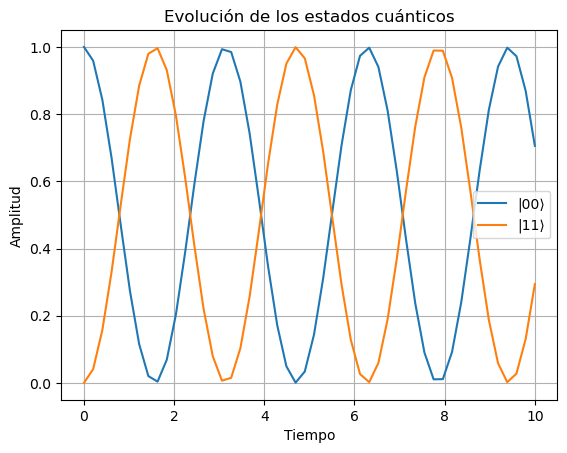

In [16]:
import matplotlib.pyplot as plt

# Código aquí ->
plt.plot(times, np.abs(stateQuant00), label="|00⟩")
plt.plot(times, np.abs(stateQuant11), label="|11⟩")
plt.xlabel("Tiempo")
plt.ylabel("Amplitud")
plt.legend()
plt.grid(True)
plt.title("Evolución de los estados cuánticos")
plt.show()
# Juegue con el valor de h para probar que utilizando valores grandes de h la dinámica se vuelve inestable

array([0.1, 0.4, 0.7, 1. ])

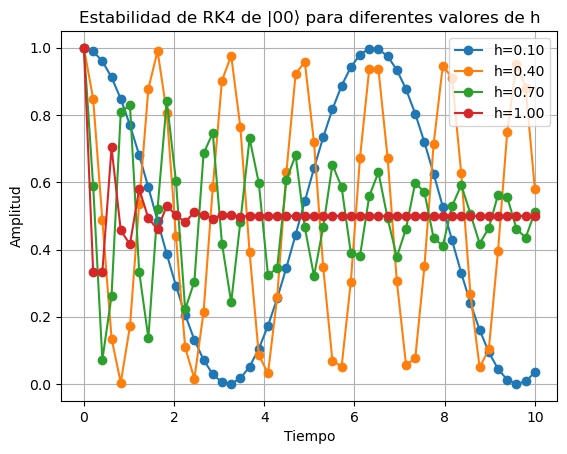

In [17]:
import matplotlib.pyplot as plt
#Juguemos con valores de h para ver la estabilidad
h_values = np.linspace(0.1,1,4)
display(h_values)
for i in range(h_values.size):
    #Reiniciamos variables en cada iteración
    yInit=yCopy #Para el estado inicial
    stateQuant00 = np.zeros(times.size, dtype=complex)
    stateQuant11 = np.zeros(times.size, dtype=complex)
    for tt in range(times.size):
        stateQuant00[tt] = yInit[0, 0]  # Elemento (0,0) del estado
        #Invocamos el rk4
        yN = rk4(dyn_generator, oOper, yInit, h_values[i])
        # Ahora asignamos yN a yInit
        yInit = yN
    # Graficar resultados para cada h
    plt.plot(times, np.abs(stateQuant00),'o-', label=f"h={h_values[i]:.2f}")
    
plt.xlabel("Tiempo")
plt.ylabel("Amplitud")
plt.title("Estabilidad de RK4 de |00⟩ para diferentes valores de h")
plt.legend()
plt.grid(True)
plt.show()
#Como podemos observar en la grafica de estabilidad para distintos valores de h, entre menor sea el valor mayor
#estabilidad tenemos, y para valores grandes de h pierde estabilidad 